### Tree-based Methods

- [8.1.1 Regression Trees](#8.1.1-Regression-Trees)
- [8.1.2 Classification Trees](#8.1.2-Classification-Trees)
- [Lab: 8.3.1 Fitting Classification Trees](#8.3.1-Fitting-Classification-Trees)
- [Lab: 8.3.2 Fitting Regression Trees](#8.3.2-Fitting-Regression-Trees)
- [Lab: 8.3.3 Bagging and Random Forests](#8.3.3-Bagging-and-Random-Forests)
- [Lab: 8.3.4 Boosting](#8.3.4-Boosting)

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO  
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report


#### Regression Trees

In R, I exported the dataset from package 'ISLR' to a csv file.

In [2]:
df = pd.read_csv('data/Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    float6

Text(0.5, 0, 'Log(Salary)')

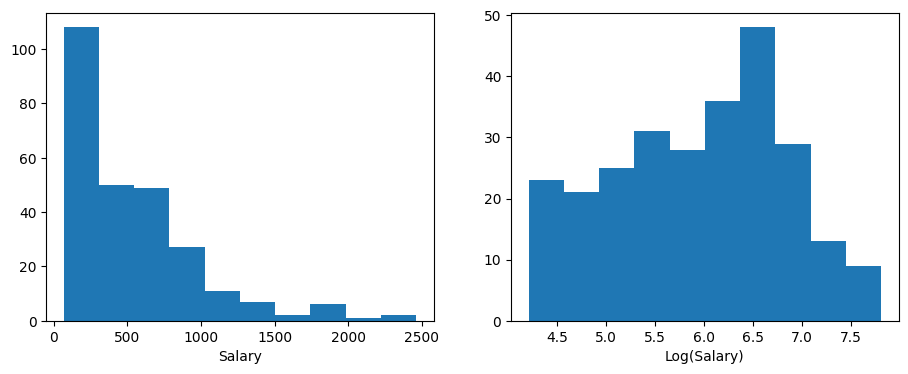

In [3]:
X = df[['Years', 'Hits']].values
y = np.log(df.Salary.values)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df.Salary.values)
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)')

In [4]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

[Text(0.4, 0.8333333333333334, 'x[0] <= 4.5\nsquared_error = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(0.2, 0.5, 'squared_error = 0.471\nsamples = 90\nvalue = 5.107'),
 Text(0.6, 0.5, 'x[1] <= 117.5\nsquared_error = 0.42\nsamples = 173\nvalue = 6.354'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.312\nsamples = 90\nvalue = 5.998'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.252\nsamples = 83\nvalue = 6.74')]

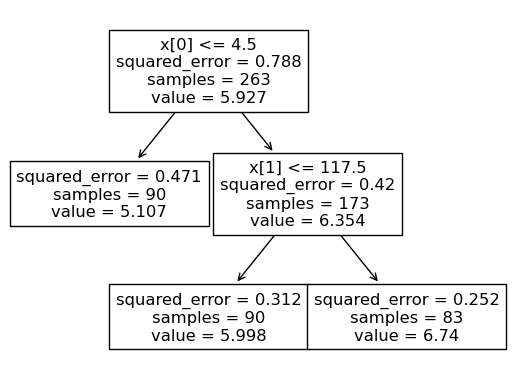

In [5]:
tree.plot_tree(regr)

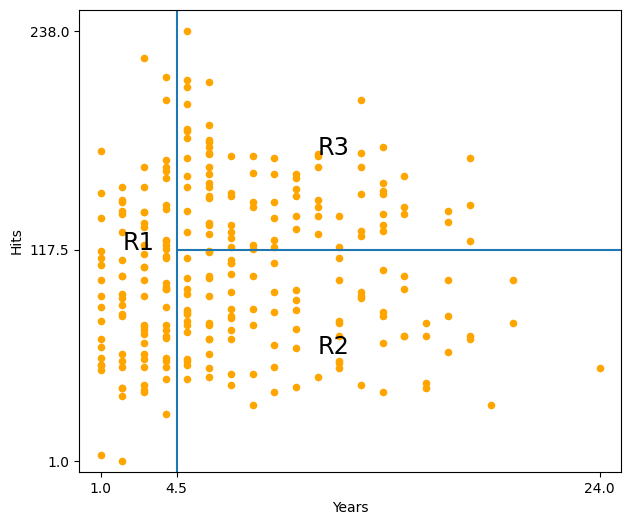

In [6]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

#### Classification Trees

Dataset available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [7]:
df2 = pd.read_csv('data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [27]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]

In [28]:
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]

In [40]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2, y2)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [41]:
clf.score(X2, y2)

0.7710437710437711

[Text(0.4090909090909091, 0.875, 'x[12] <= 1.5\ngini = 0.497\nsamples = 297\nvalue = [160, 137]'),
 Text(0.18181818181818182, 0.625, 'x[2] <= 1.5\ngini = 0.393\nsamples = 182\nvalue = [133, 49]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.497\nsamples = 80\nvalue = [43, 37]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.208\nsamples = 102\nvalue = [90, 12]'),
 Text(0.6363636363636364, 0.625, 'x[7] <= 144.5\ngini = 0.359\nsamples = 115\nvalue = [27, 88]'),
 Text(0.45454545454545453, 0.375, 'x[9] <= 0.6\ngini = 0.133\nsamples = 56\nvalue = [4, 52]'),
 Text(0.36363636363636365, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.5454545454545454, 0.125, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]'),
 Text(0.8181818181818182, 0.375, 'x[11] <= 0.5\ngini = 0.476\nsamples = 59\nvalue = [23, 36]'),
 Text(0.7272727272727273, 0.125, 'gini = 0.48\nsamples = 30\nvalue = [18, 12]'),
 Text(0.9090909090909091, 0.125, 'gini = 0.285\nsamples = 29\nvalue = [5, 24]')]

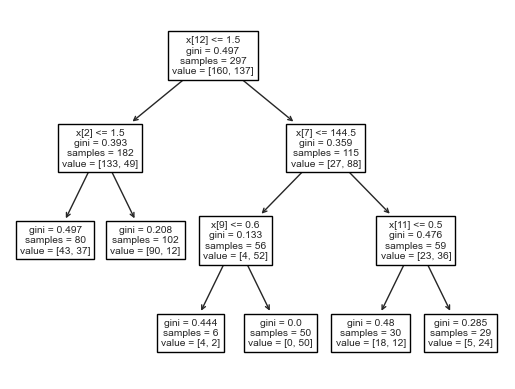

In [42]:
tree.plot_tree(clf)

#### Bagging and Random Forests

In [44]:
boston_df = pd.read_csv('data/Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [45]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [47]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(max_features=13, random_state=1)

Text(0, 0.5, 'y_test')

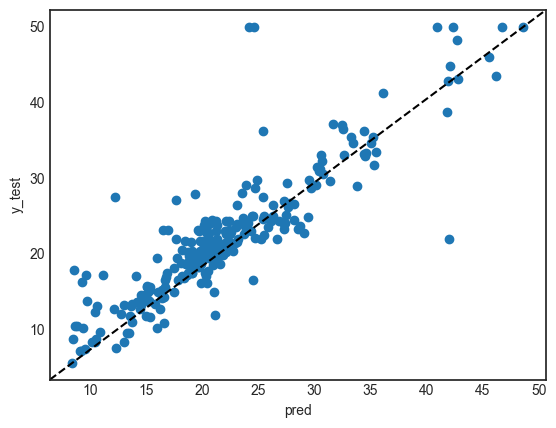

In [48]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [49]:
mean_squared_error(y_test, pred)

16.17512869960475

In [50]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=1)

In [51]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

15.82350045849802

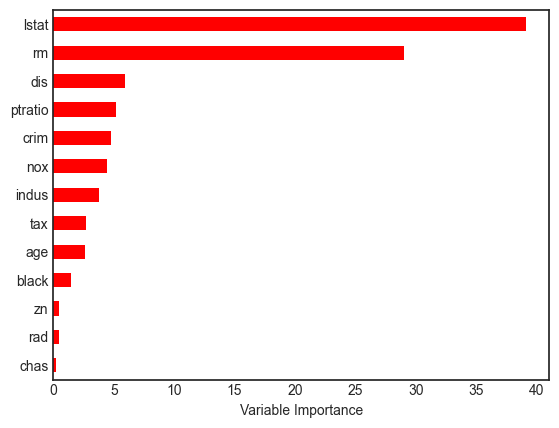

In [52]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

100


[Text(0.5361191542832168, 0.9705882352941176, 'x[12] <= 8.075\nsquared_error = 76.958\nsamples = 156\nvalue = 23.001'),
 Text(0.26704545454545453, 0.9117647058823529, 'x[5] <= 7.513\nsquared_error = 58.747\nsamples = 56\nvalue = 31.044'),
 Text(0.18094405594405594, 0.8529411764705882, 'x[0] <= 4.727\nsquared_error = 37.196\nsamples = 45\nvalue = 29.145'),
 Text(0.17395104895104896, 0.7941176470588235, 'x[7] <= 5.075\nsquared_error = 21.668\nsamples = 43\nvalue = 28.362'),
 Text(0.09527972027972027, 0.7352941176470589, 'x[1] <= 10.0\nsquared_error = 14.294\nsamples = 20\nvalue = 30.374'),
 Text(0.043706293706293704, 0.6764705882352942, 'x[0] <= 0.064\nsquared_error = 13.079\nsamples = 13\nvalue = 28.896'),
 Text(0.02097902097902098, 0.6176470588235294, 'x[12] <= 5.965\nsquared_error = 0.171\nsamples = 3\nvalue = 24.088'),
 Text(0.013986013986013986, 0.5588235294117647, 'x[0] <= 0.059\nsquared_error = 0.022\nsamples = 2\nvalue = 23.78'),
 Text(0.006993006993006993, 0.5, 'squared_error = 

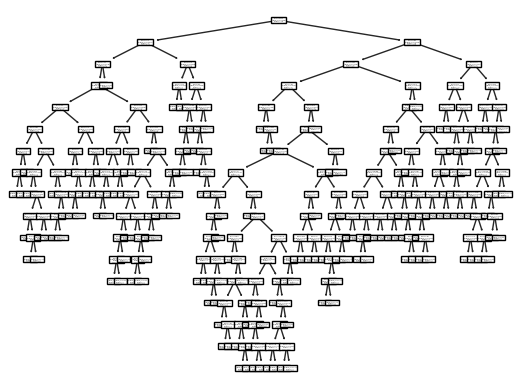

In [60]:
print(len(regr2.estimators_))
tree.plot_tree(regr2.estimators_[1])

#### Boosting

In [53]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, random_state=1)

zn          0.013059
chas        0.121257
rad         0.153199
black       0.460309
indus       0.576559
nox         0.731767
age         0.922677
tax         1.098078
crim        2.799589
ptratio     4.370389
dis         5.896297
rm         27.934202
lstat      54.922618
dtype: float64


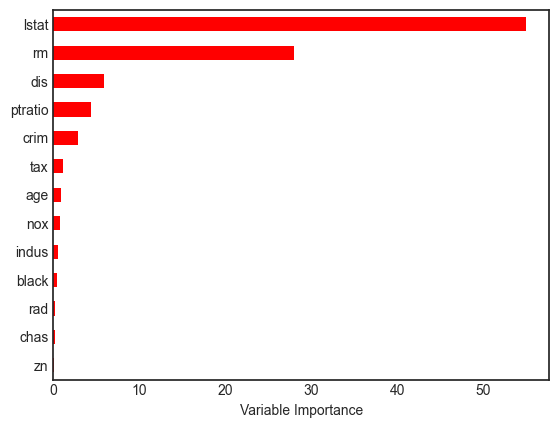

In [61]:
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [55]:
mean_squared_error(y_test, regr.predict(X_test))

15.592155779633027